<a href="https://colab.research.google.com/github/BensalemHafsa/ML-Project-Churn-Prediction-/blob/main/ML%20Project%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Importing_Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**#Reading_Dataset**

In [ ]:
Telecom = pd.read_csv("Churn.csv")

In [ ]:
Telecom.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [ ]:
Telecom.drop(["Customer ID"], axis=1, inplace=True)

In [ ]:
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7044 entries, 0 to 7043
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7044 non-null   object 
 1   Senior Citizen     7044 non-null   int64  
 2   Partner            7044 non-null   object 
 3   Dependents         7044 non-null   object 
 4   tenure             7044 non-null   int64  
 5   Phone Service      7044 non-null   object 
 6   Multiple Lines     7044 non-null   object 
 7   Internet Service   7044 non-null   object 
 8   Online Security    7044 non-null   object 
 9   Online Backup      7044 non-null   object 
 10  Device Protection  7044 non-null   object 
 11  Tech Support       7044 non-null   object 
 12  Streaming TV       7044 non-null   object 
 13  Streaming Movies   7044 non-null   object 
 14  Contract           7044 non-null   object 
 15  Paperless Billing  7044 non-null   object 
 16  Payment Method     7044 

In [ ]:
Telecom.columns.values

array(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection',
       'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn'], dtype=object)

In [ ]:
Telecom.dtypes

Gender                 int64
Senior Citizen         int64
Partner                int64
Dependents             int64
tenure               float64
Phone Service          int64
Multiple Lines         int64
Internet Service       int64
Online Security        int64
Online Backup          int64
Device Protection      int64
Tech Support           int64
Streaming TV           int64
Streaming Movies       int64
Contract               int64
Paperless Billing      int64
Payment Method         int64
Monthly Charges      float64
Total Charges        float64
Churn                  int64
dtype: object

In [ ]:
Telecom.describe()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
count,7021.0,7021.000000,7021.0,7021.0,7021.000000,7021.0,7021.0,7021.0,7021.0,7021.0,7021.0,7021.0,7021.0,7021.0,7021.0,7021.0,7021.0,7021.000000,7021.000000,7021.000000
mean,1.0,0.162512,1.0,1.0,0.450965,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.463700,2290.353388,0.264492
std,0.0,0.368947,0.0,0.0,0.340763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299194,2265.044136,0.441094
min,1.0,0.000000,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,18.800000,0.000000
25%,1.0,0.000000,1.0,1.0,0.125000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.174129,411.150000,0.000000
50%,1.0,0.000000,1.0,1.0,0.402778,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.518905,1410.250000,0.000000
75%,1.0,0.000000,1.0,1.0,0.763889,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.712935,3801.700000,1.000000
max,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,8684.800000,1.000000


In [ ]:
Telecom = Telecom.drop_duplicates()
Telecom.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [ ]:
Telecom.dropna(inplace = True)
Telecom['Churn'].replace(to_replace='Yes', value=1, inplace=True)
Telecom['Churn'].replace(to_replace='No',  value=0, inplace=True)
Telecom.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
Telecom.dropna(inplace = True)
Telecom['Churn'].replace(to_replace='Yes', value=1, inplace=True)
Telecom['Churn'].replace(to_replace='No',  value=0, inplace=True)
Telecom.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
3,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
5,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


**#Scatter_plot**

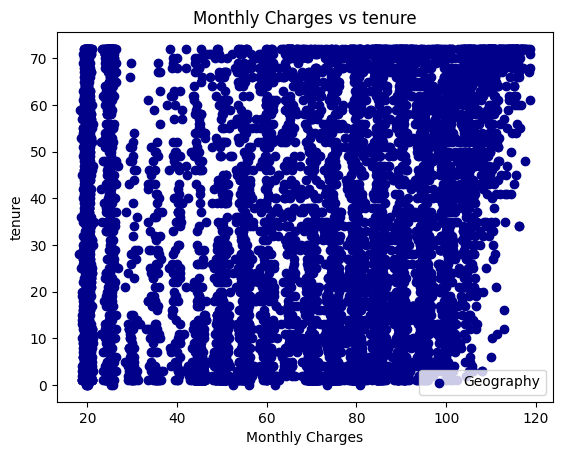

In [ ]:
plt.scatter(data=Telecom, x="Monthly Charges", y="tenure", color="darkblue", label="Geography")
plt.legend()
plt.title("Monthly Charges vs tenure")
plt.xlabel("Monthly Charges")
plt.ylabel("tenure")
plt.show()

**#Pie_Plot**

<function matplotlib.pyplot.show(close=None, block=None)>

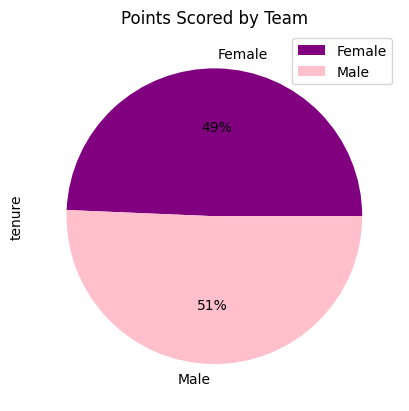

In [ ]:
Telecom.groupby(['Gender']).sum().plot(kind='pie', y='tenure', autopct='%1.0f%%',
                                colors = ['purple', 'pink'],
                                title='Points Scored by Team')
plt.show

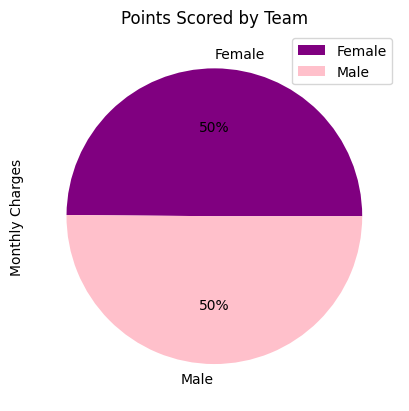

In [ ]:
Telecom.groupby(['Gender']).sum().plot(kind='pie', y='Monthly Charges', autopct='%1.0f%%',
                                colors = ['purple', 'pink'],
                                title='Points Scored by Team')
plt.show()

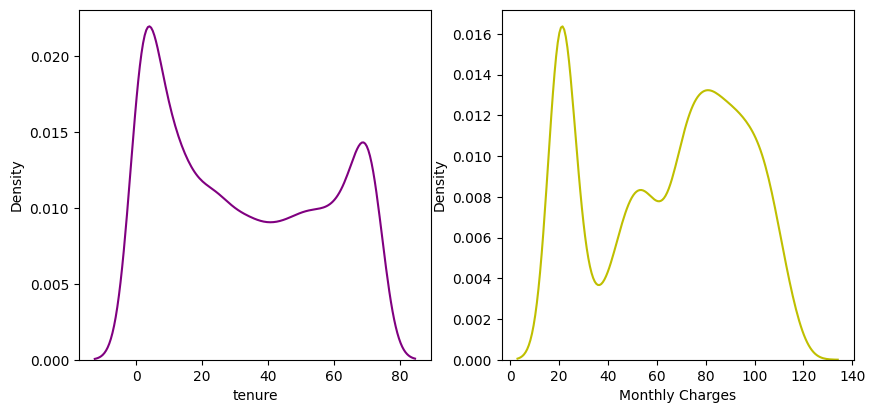

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(Telecom ['tenure'], color="purple")
plt.subplot(2,2,2)
sns.kdeplot(Telecom ['Monthly Charges'], color="y")
plt.show()

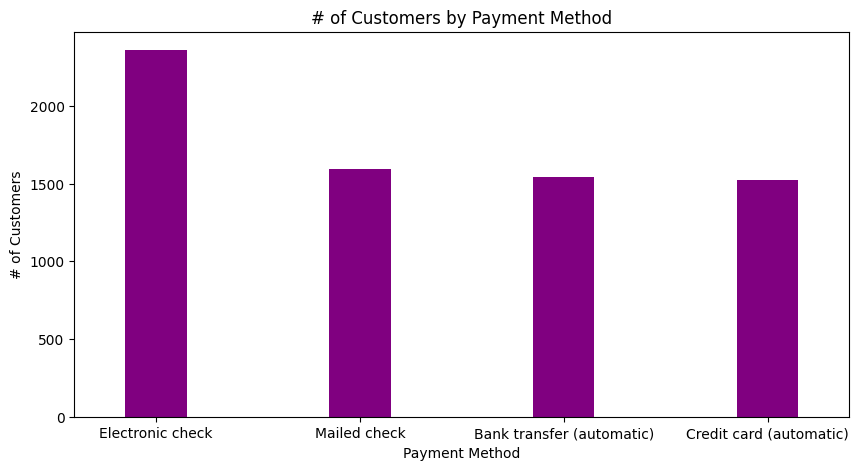

In [ ]:
fig=plt.figure(figsize=(10,5))
ax = Telecom['Payment Method'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color="purple")
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Payment Method')
plt.show()

Text(0.5, 1.0, '# of Customers by Contract Type')

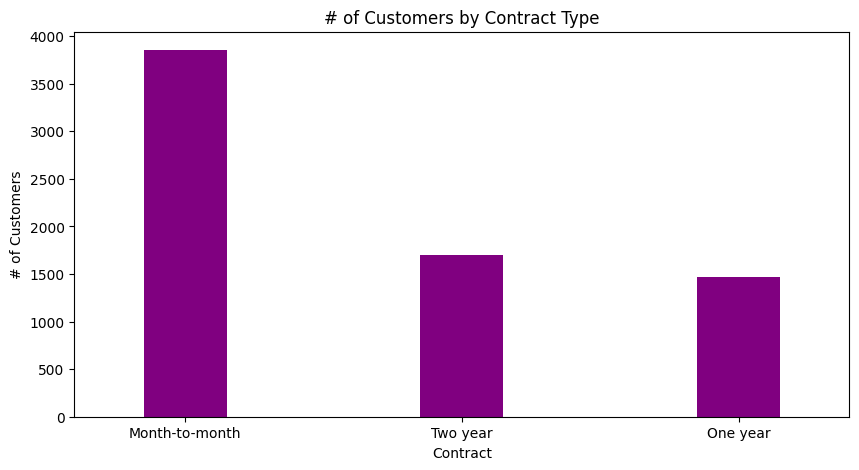

In [ ]:
fig=plt.figure(figsize=(10,5))
ax = Telecom['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color="purple")
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

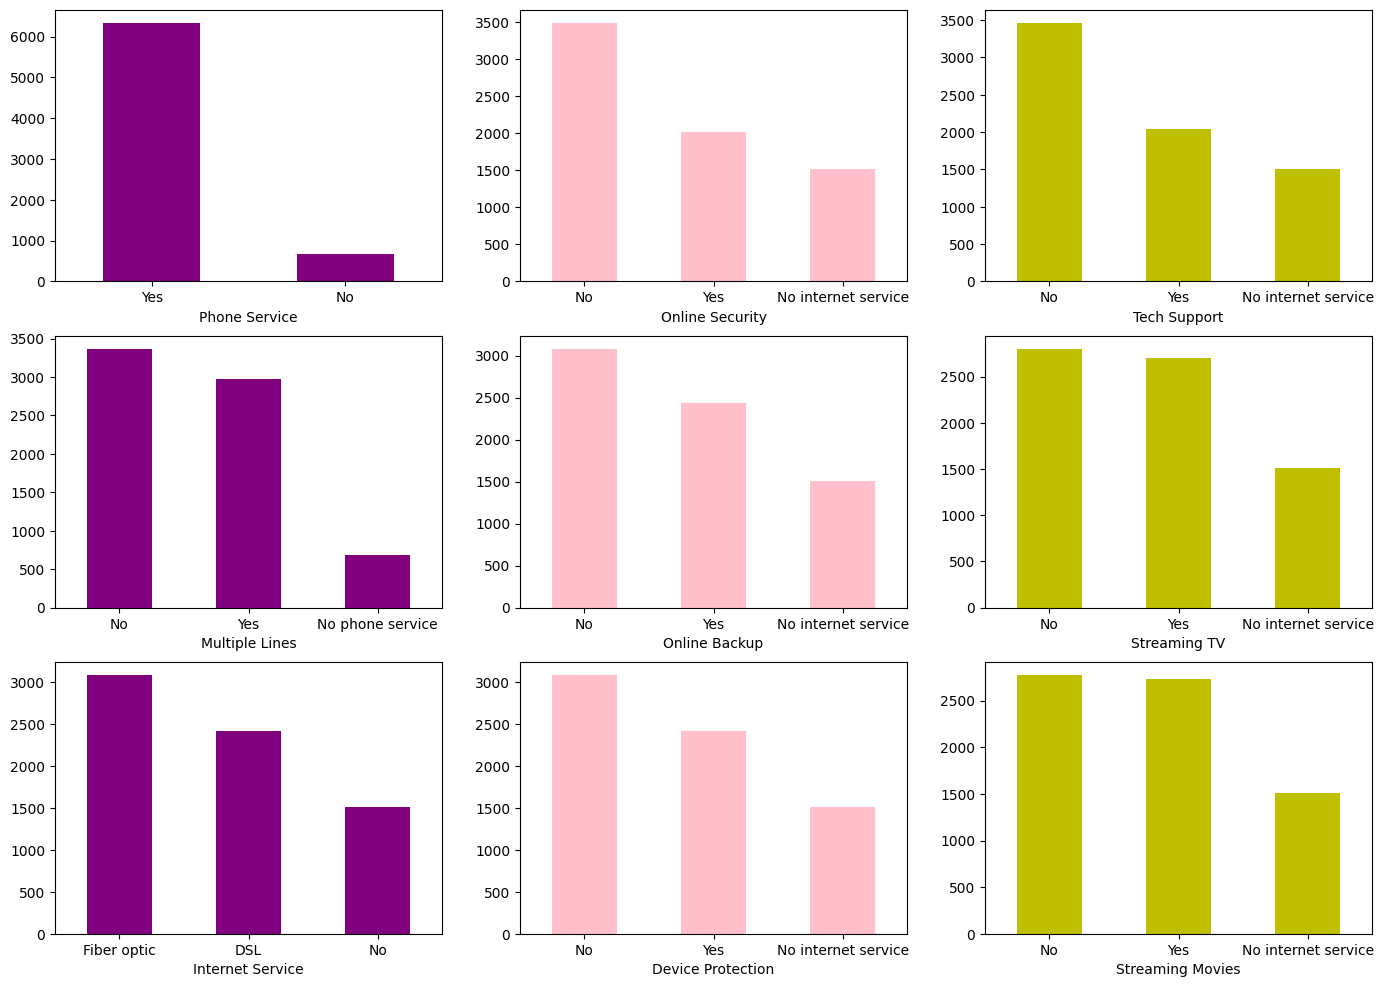

In [ ]:
services = ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (17,12))
for i, item in enumerate(services):
    if i < 3:
        ax = Telecom[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color="purple")

    elif i >=3 and i < 6:
        ax = Telecom [item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color="pink")
    elif i < 9:
        ax = Telecom[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color="y")


<ipython-input-18-7cfafadabd1b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Telecom['tenure'], hist=True, kde=False,
<ipython-input-18-7cfafadabd1b>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Telecom['Monthly Charges'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their Monthly Charges')

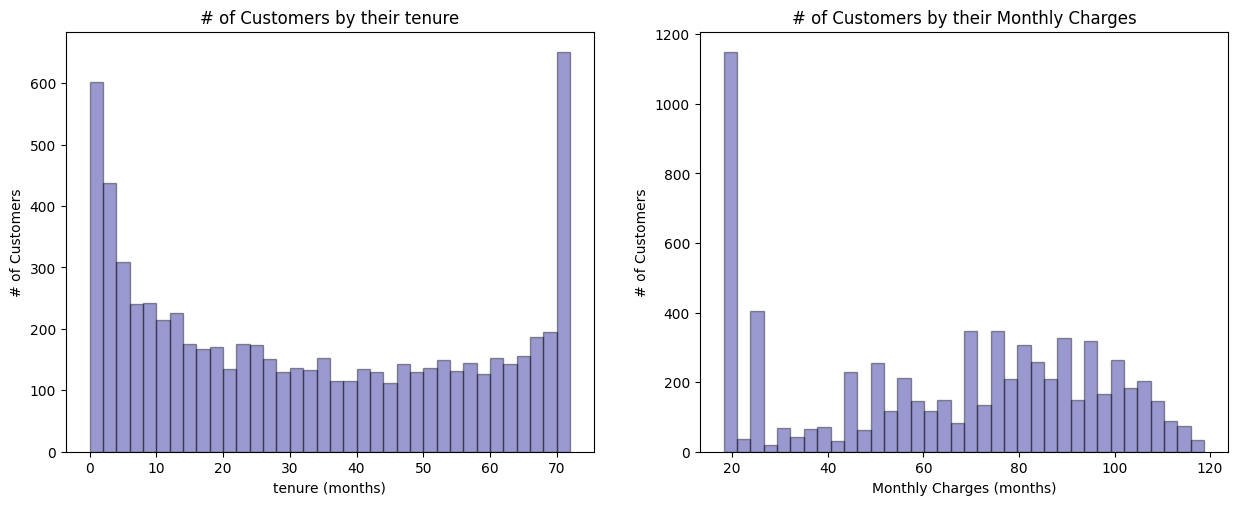

In [ ]:
fig=plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
ax = sns.distplot(Telecom['tenure'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('tenure (months)')
ax.set_title('# of Customers by their tenure')

plt.subplot(2,2,2)
ax = sns.distplot(Telecom['Monthly Charges'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Monthly Charges (months)')
ax.set_title('# of Customers by their Monthly Charges')

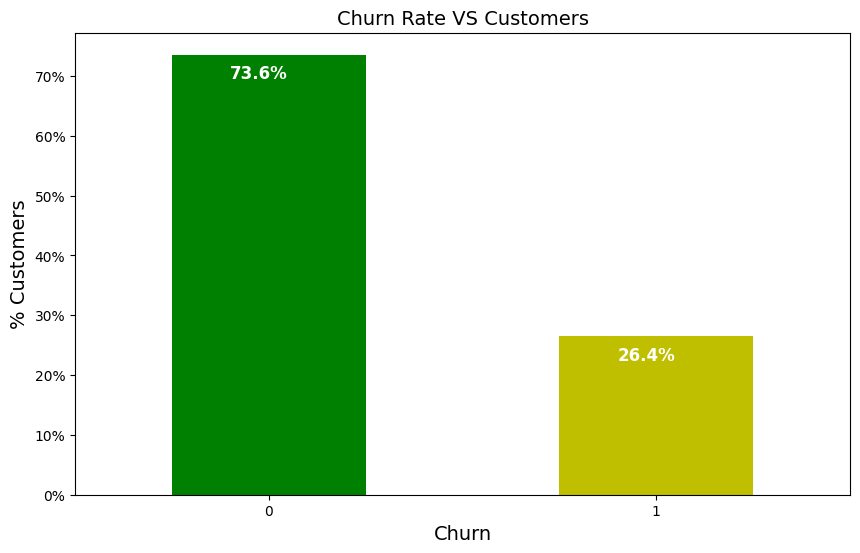

In [ ]:
import matplotlib.ticker as mtick
colors = ['g','y']
ax = (Telecom['Churn'].value_counts()*100.0 /len(Telecom)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate VS Customers', size = 14)

totals = []


for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:

    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           )


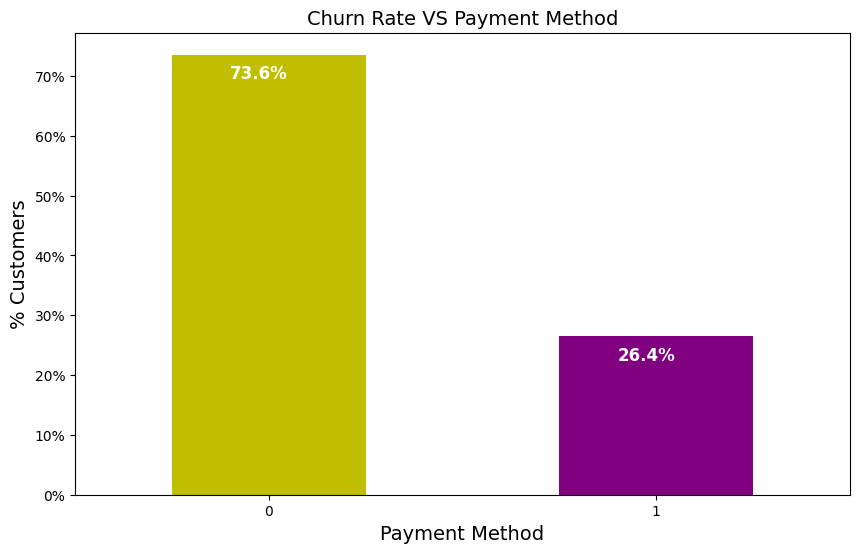

In [ ]:
colors = ['y','purple']
ax = (Telecom['Churn'].value_counts()*100.0 /len(Telecom)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Payment Method',size = 14)
ax.set_title('Churn Rate VS Payment Method', size = 14)
# create a list to collect the plt.patches data
totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:

    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           )

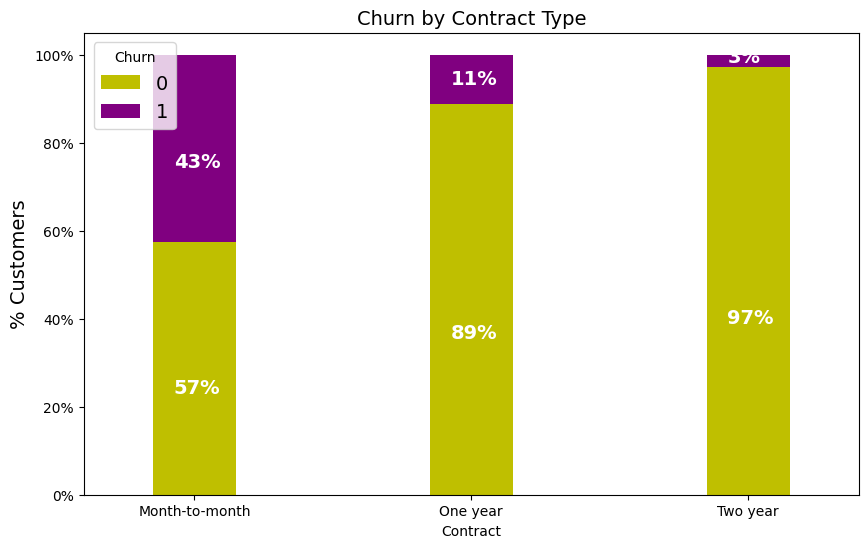

In [ ]:
colors = ['y','purple']
contract_churn = Telecom.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

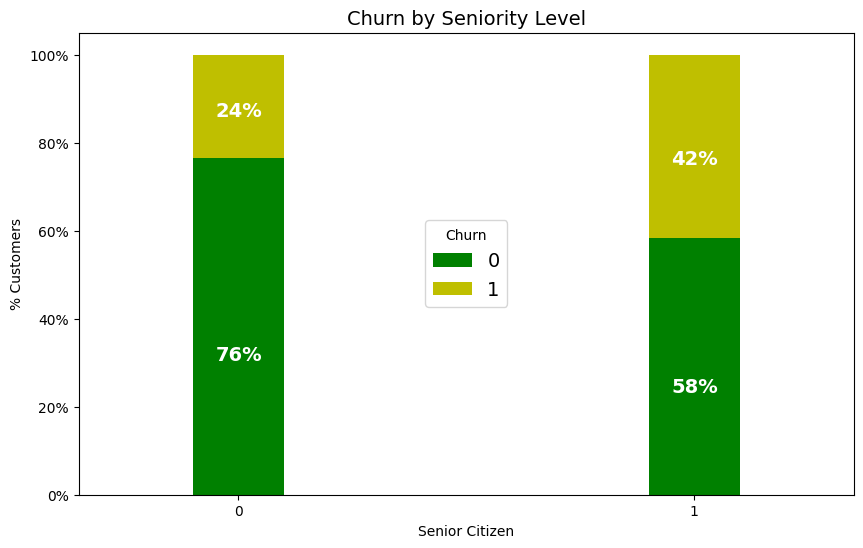

In [ ]:
colors = ['g','y']
seniority_churn = Telecom.groupby(['Senior Citizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)


**#Box_Plot**

<Axes: xlabel='Internet Service', ylabel='tenure'>

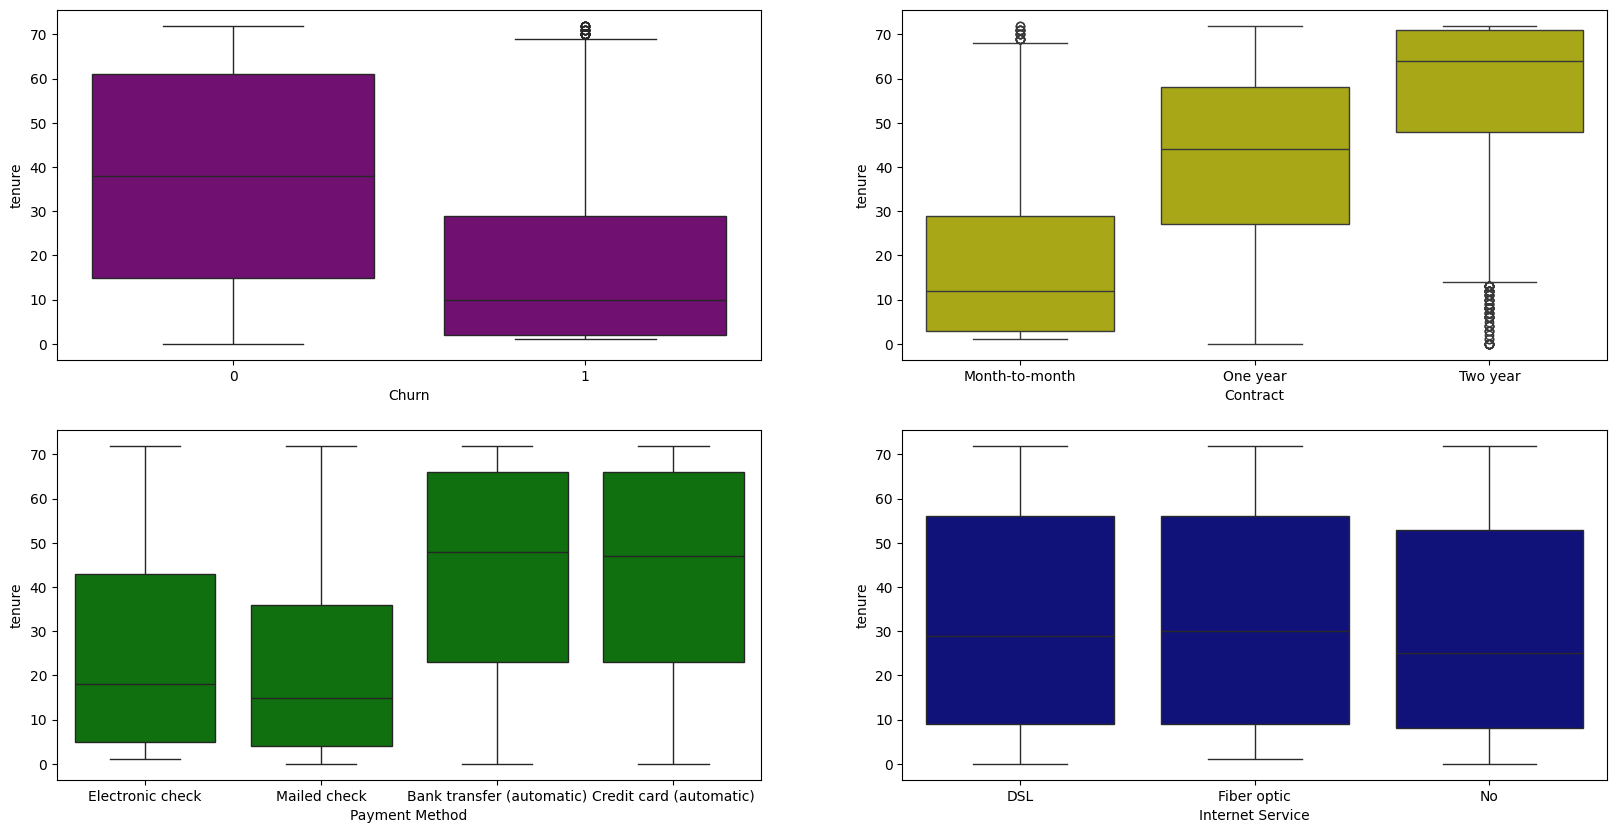

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x = Telecom.Churn, y = Telecom.tenure, color = "purple")
plt.subplot(2,2,2)
sns.boxplot(x = Telecom.Contract, y = Telecom.tenure, color = "y")
plt.subplot(2,2,3)
sns.boxplot(x = "Payment Method", y = "tenure", data = Telecom, color = "g")
plt.subplot(2,2,4)
sns.boxplot(x = "Internet Service", y = "tenure", data = Telecom, color = "darkblue")

**#Preprocessing_&_Spliting_Data**

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**#Label_Encoder**

In [ ]:
Telecom["Gender"]= Telecom["Gender"].apply(lambda x:0 if x== False else 1)
Telecom["Senior Citizen"]= Telecom["Senior Citizen"].apply(lambda x:0 if x== False else 1)
Telecom["Partner"]= Telecom["Partner"].apply(lambda x:0 if x== False else 1)
Telecom["Dependents"]= Telecom["Dependents"].apply(lambda x:0 if x== False else 1)
Telecom["Phone Service"]= Telecom["Phone Service"].apply(lambda x:0 if x== False else 1)
Telecom["Multiple Lines"]= Telecom["Multiple Lines"].apply(lambda x:0 if x== False else 1)
Telecom["Internet Service"]= Telecom["Internet Service"].apply(lambda x:0 if x== False else 1)
Telecom["Online Security"]= Telecom["Online Security"].apply(lambda x:0 if x== False else 1)
Telecom["Online Backup"]= Telecom["Online Backup"].apply(lambda x:0 if x== False else 1)
Telecom["Device Protection"]= Telecom["Device Protection"].apply(lambda x:0 if x== False else 1)
Telecom["Tech Support"]= Telecom["Tech Support"].apply(lambda x:0 if x== False else 1)
Telecom["Streaming TV"]= Telecom["Streaming TV"].apply(lambda x:0 if x== False else 1)
Telecom["Tech Support"]= Telecom["Tech Support"].apply(lambda x:0 if x== False else 1)
Telecom["Streaming TV"]= Telecom["Streaming TV"].apply(lambda x:0 if x== False else 1)
Telecom["Streaming Movies"]= Telecom["Streaming Movies"].apply(lambda x:0 if x== False else 1)
Telecom["Paperless Billing"]= Telecom["Paperless Billing"].apply(lambda x:0 if x== False else 1)
Telecom["Payment Method"]= Telecom["Payment Method"].apply(lambda x:0 if x== False else 1)
Telecom["Contract"]= Telecom["Contract"].apply(lambda x:0 if x== False else 1)
Telecom["Churn"]= Telecom["Churn"].apply(lambda x:0 if x== False else 1)

**#MinMax_Scaling**

**#Standard_Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Telecom["tenure"] = sc.fit_transform(Telecom[["tenure"]])
Scaler = MinMaxScaler()
Telecom["Monthly Charges"] = Scaler.fit_transform(Telecom[["Monthly Charges"]])
Telecom["tenure"] = Scaler.fit_transform(Telecom[["tenure"]])

In [ ]:
df_dummies = pd.get_dummies(Telecom)

In [ ]:
Telecom.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,1,0,1,1,0.013889,1,1,1,1,1,1,1,1,1,1,1,1,0.115423,29.85,0
2,1,0,1,1,0.472222,1,1,1,1,1,1,1,1,1,1,1,1,0.385075,1889.5,0
3,1,0,1,1,0.027778,1,1,1,1,1,1,1,1,1,1,1,1,0.354229,108.15,1
4,1,0,1,1,0.625000,1,1,1,1,1,1,1,1,1,1,1,1,0.239303,1840.75,0
5,1,0,1,1,0.027778,1,1,1,1,1,1,1,1,1,1,1,1,0.521891,151.65,1


In [ ]:
Telecom = Telecom.apply(pd.to_numeric, errors='coerce')
Telecom.fillna(Telecom.mean(), inplace=True)

**#Spliting_Data**

In [ ]:
from sklearn.model_selection import train_test_split
x= Telecom.drop(["Churn"], axis=1)
y = Telecom["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**#Logistic_Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
m1 = LogisticRegression(penalty="l2",C=10)
m1.fit(x_train,y_train)
yp = m1.predict(x_test)
ac1 = accuracy_score(yp,y_test)
ac1

0.7859515899383009

**#Confusion_Matrix_ of_Logistic_Regression**

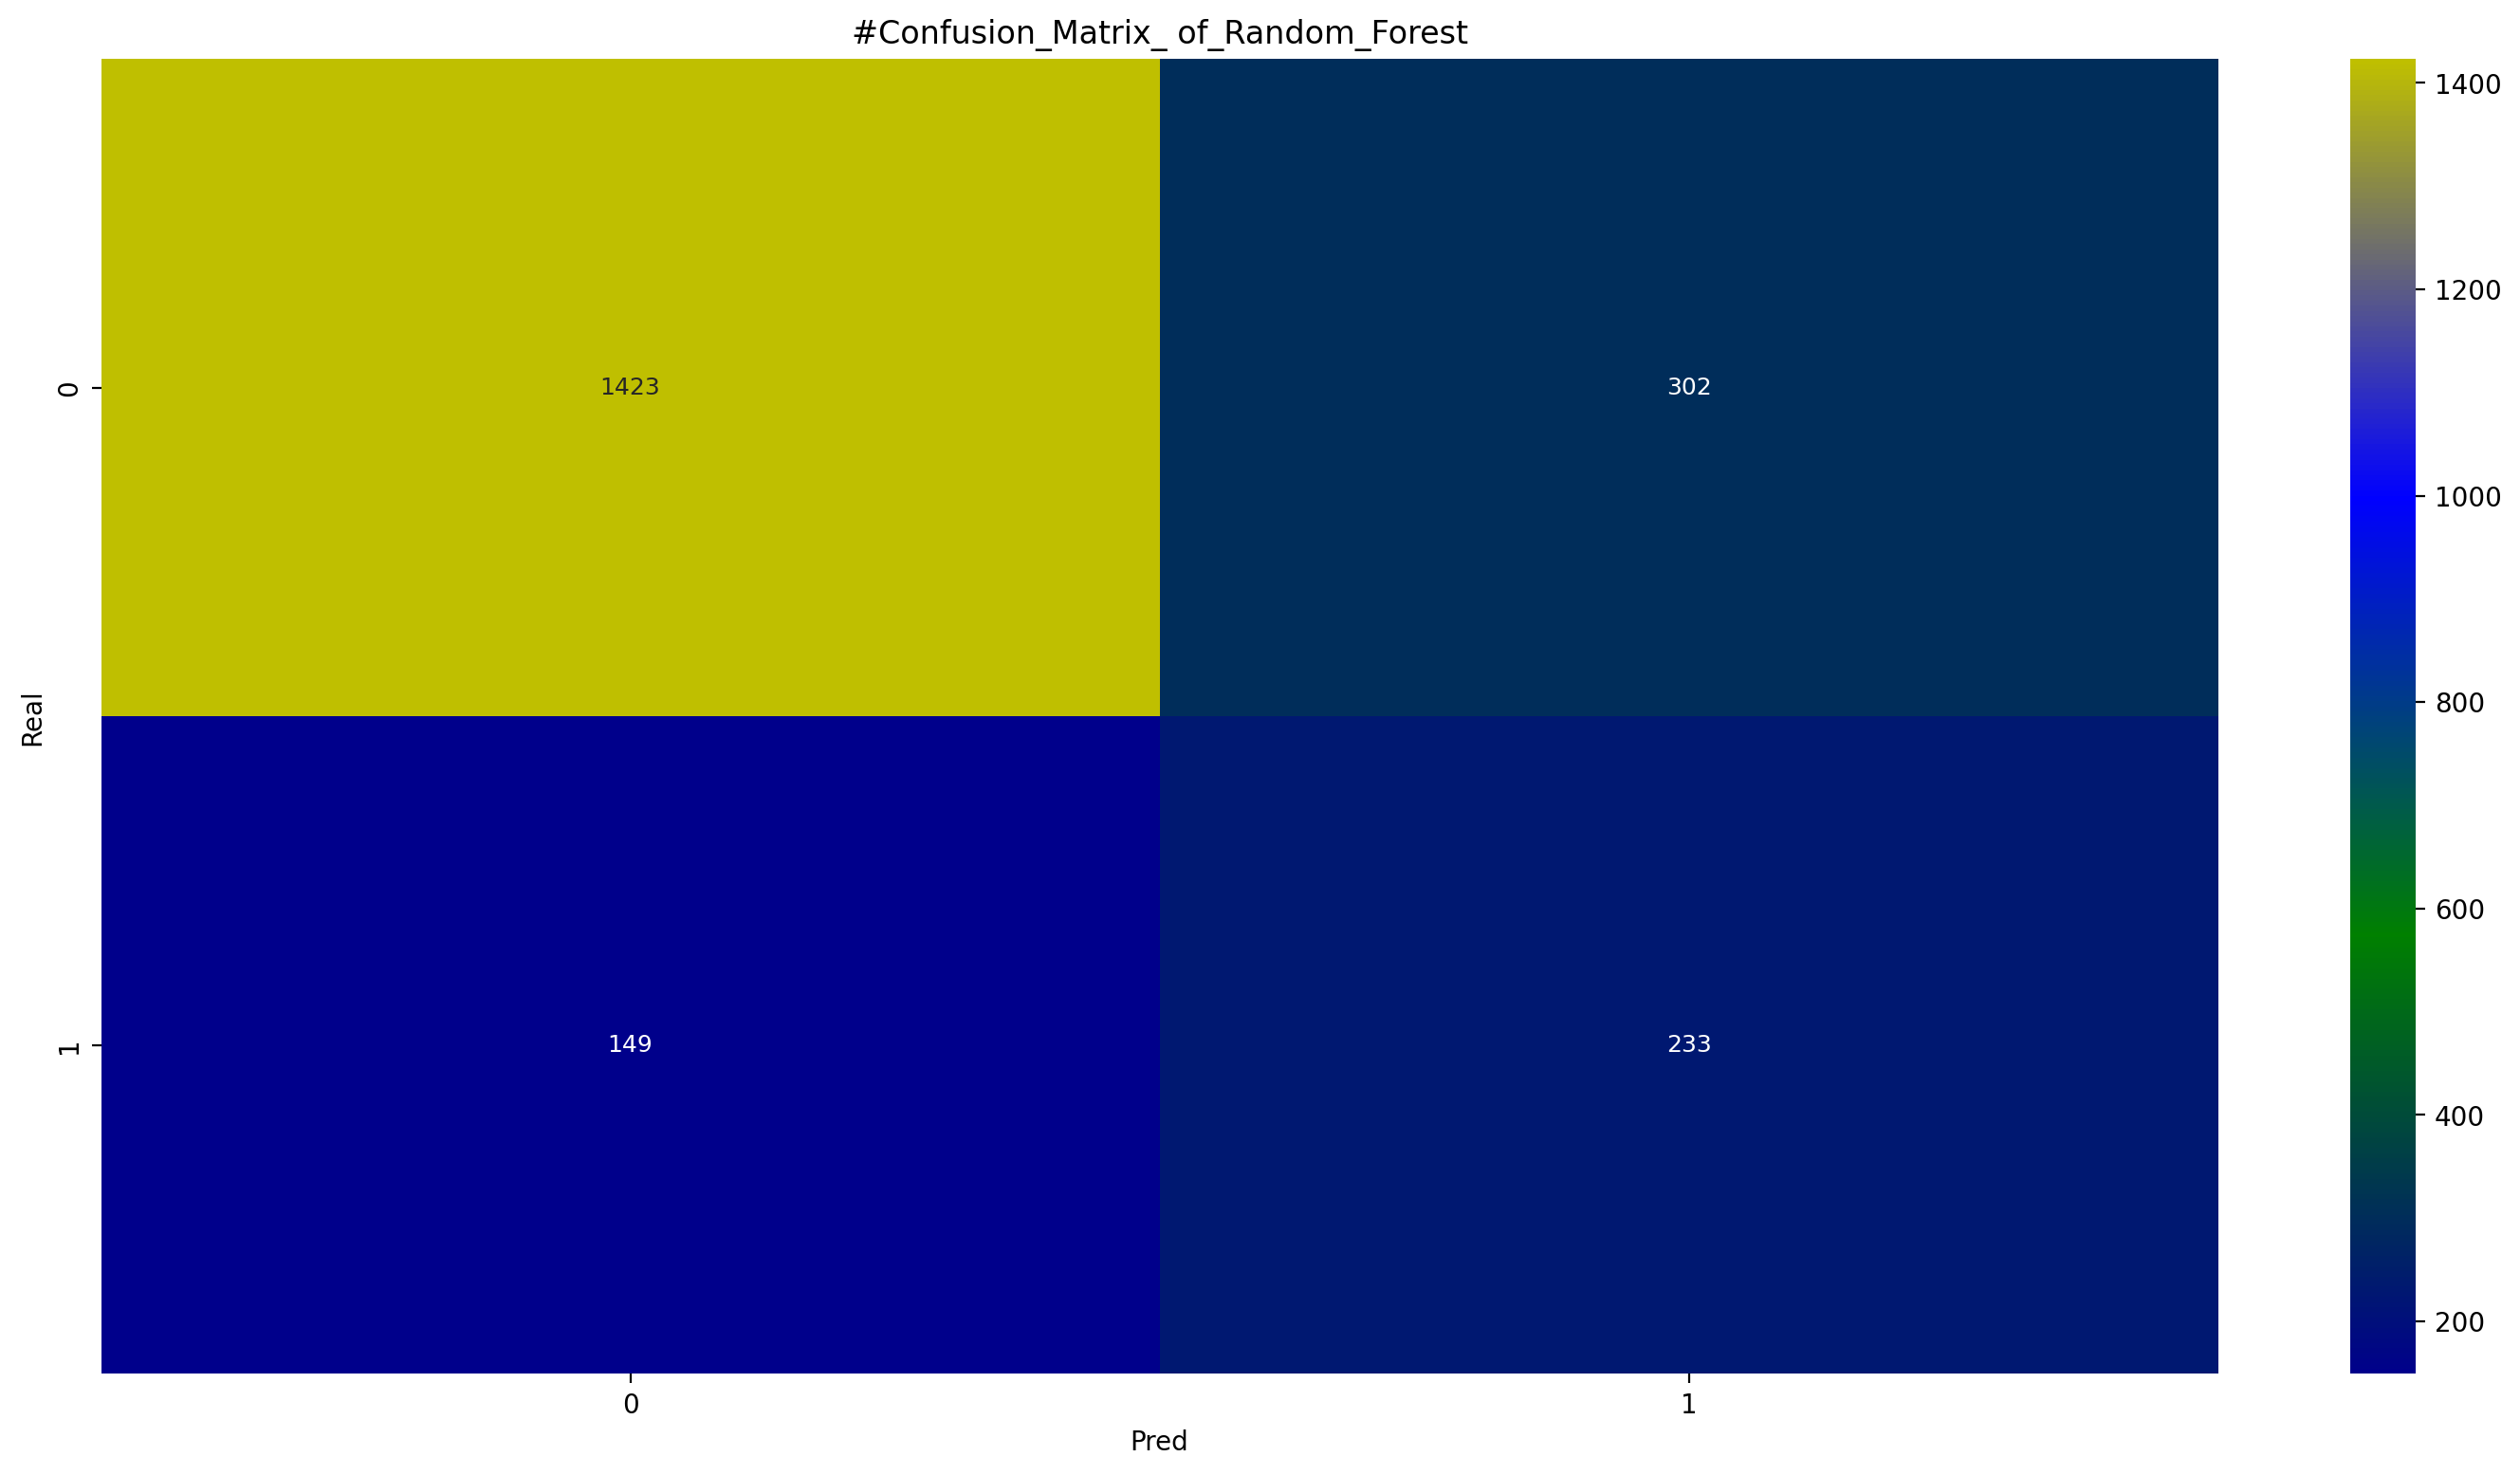

In [ ]:
import matplotlib.colors
from sklearn.metrics import confusion_matrix
conf_matrix_1 = confusion_matrix(yp,y_test)

colors = ["darkblue", "g", "blue", "y"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(18, 9), dpi=200)
ax = plt.subplot()
plt.title("#Confusion_Matrix_ of_Random_Forest")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 9},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**#Random_Forest_Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

classifier = RandomForestClassifier(n_estimators = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
ac2 = accuracy_score(y_pred,y_test)
ac2

0.7546274323682961

**#Confusion_Matrix_ of_Random_Forest**

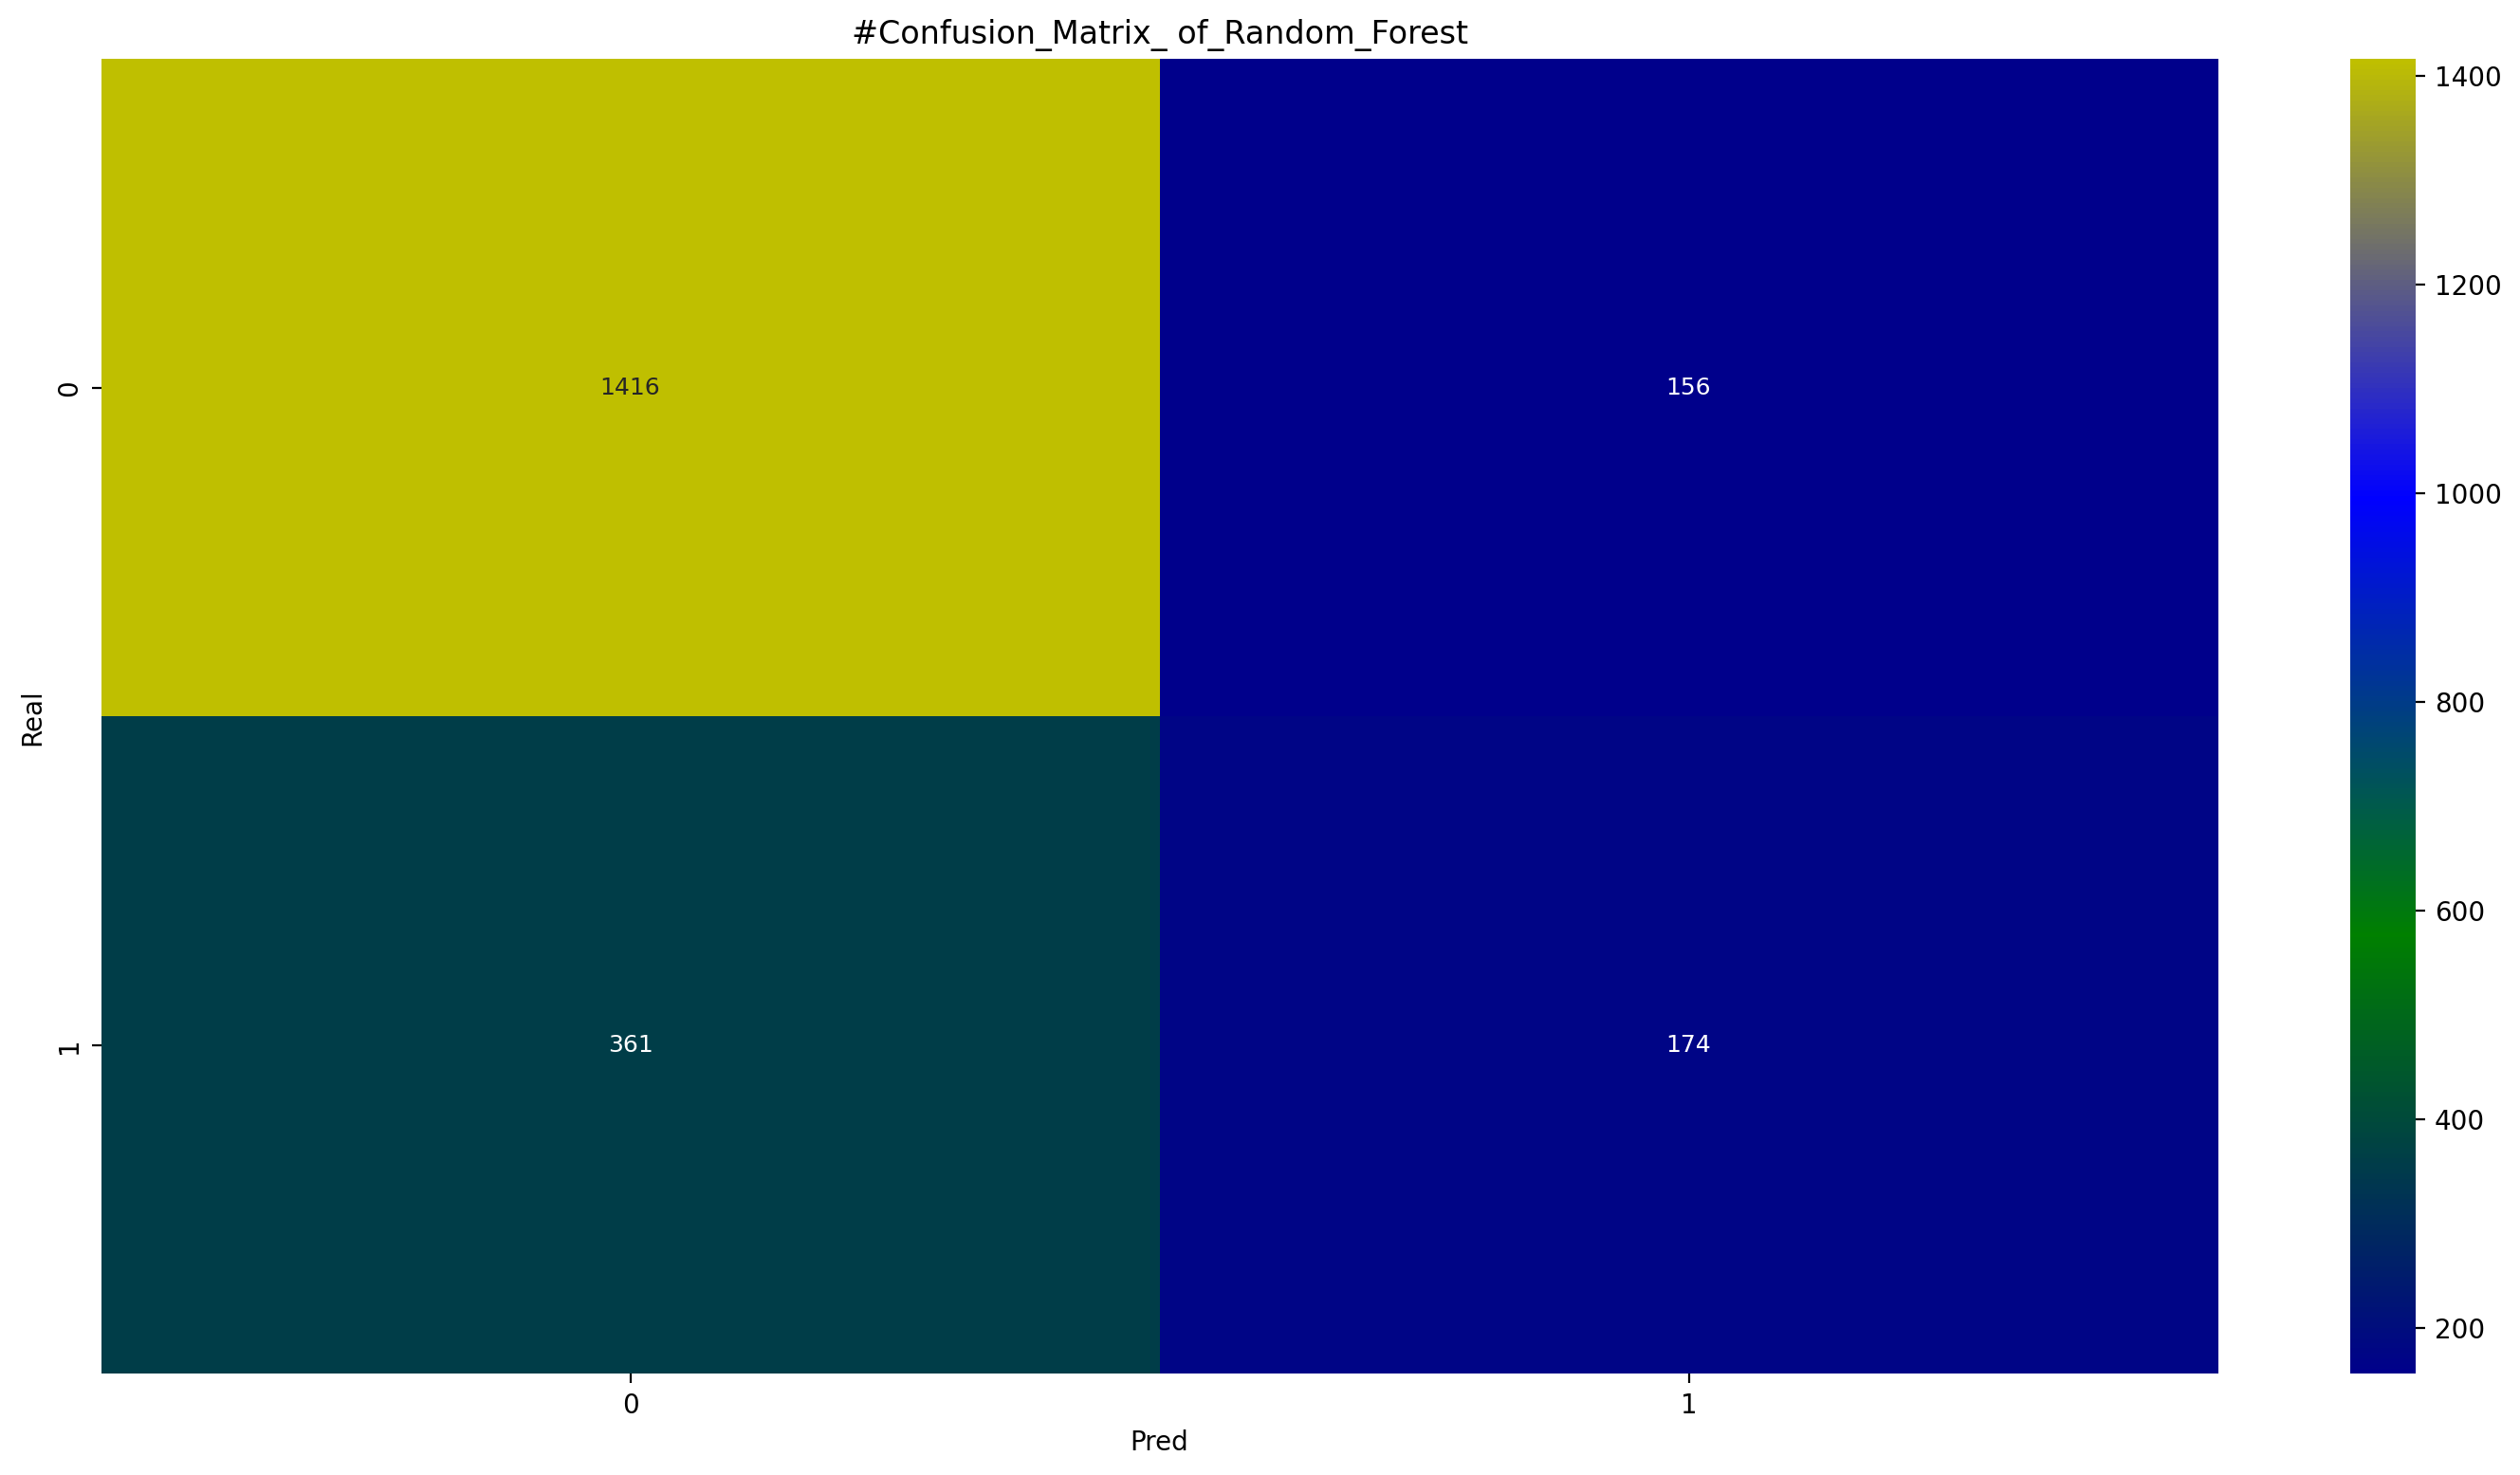

In [ ]:
import matplotlib.colors

conf_matrix_1 = confusion_matrix (y_test,y_pred)

colors = ["darkblue", "g", "blue", "y"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(18, 9), dpi=200)
ax = plt.subplot()
plt.title("#Confusion_Matrix_ of_Random_Forest")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 9},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**#Support_Vector_Machine**

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf",C=0.1,gamma=0.1)
clf.fit(x_train,y_train)
yp = clf.predict(x_test)
ypt = clf.predict(x_train)
ac = accuracy_score(ypt,y_train)
ac3= accuracy_score(yp,y_test)
ac, ac3

(0.7472527472527473, 0.7612719506407214)

**#Confusion_Matrix_Of_SVC**

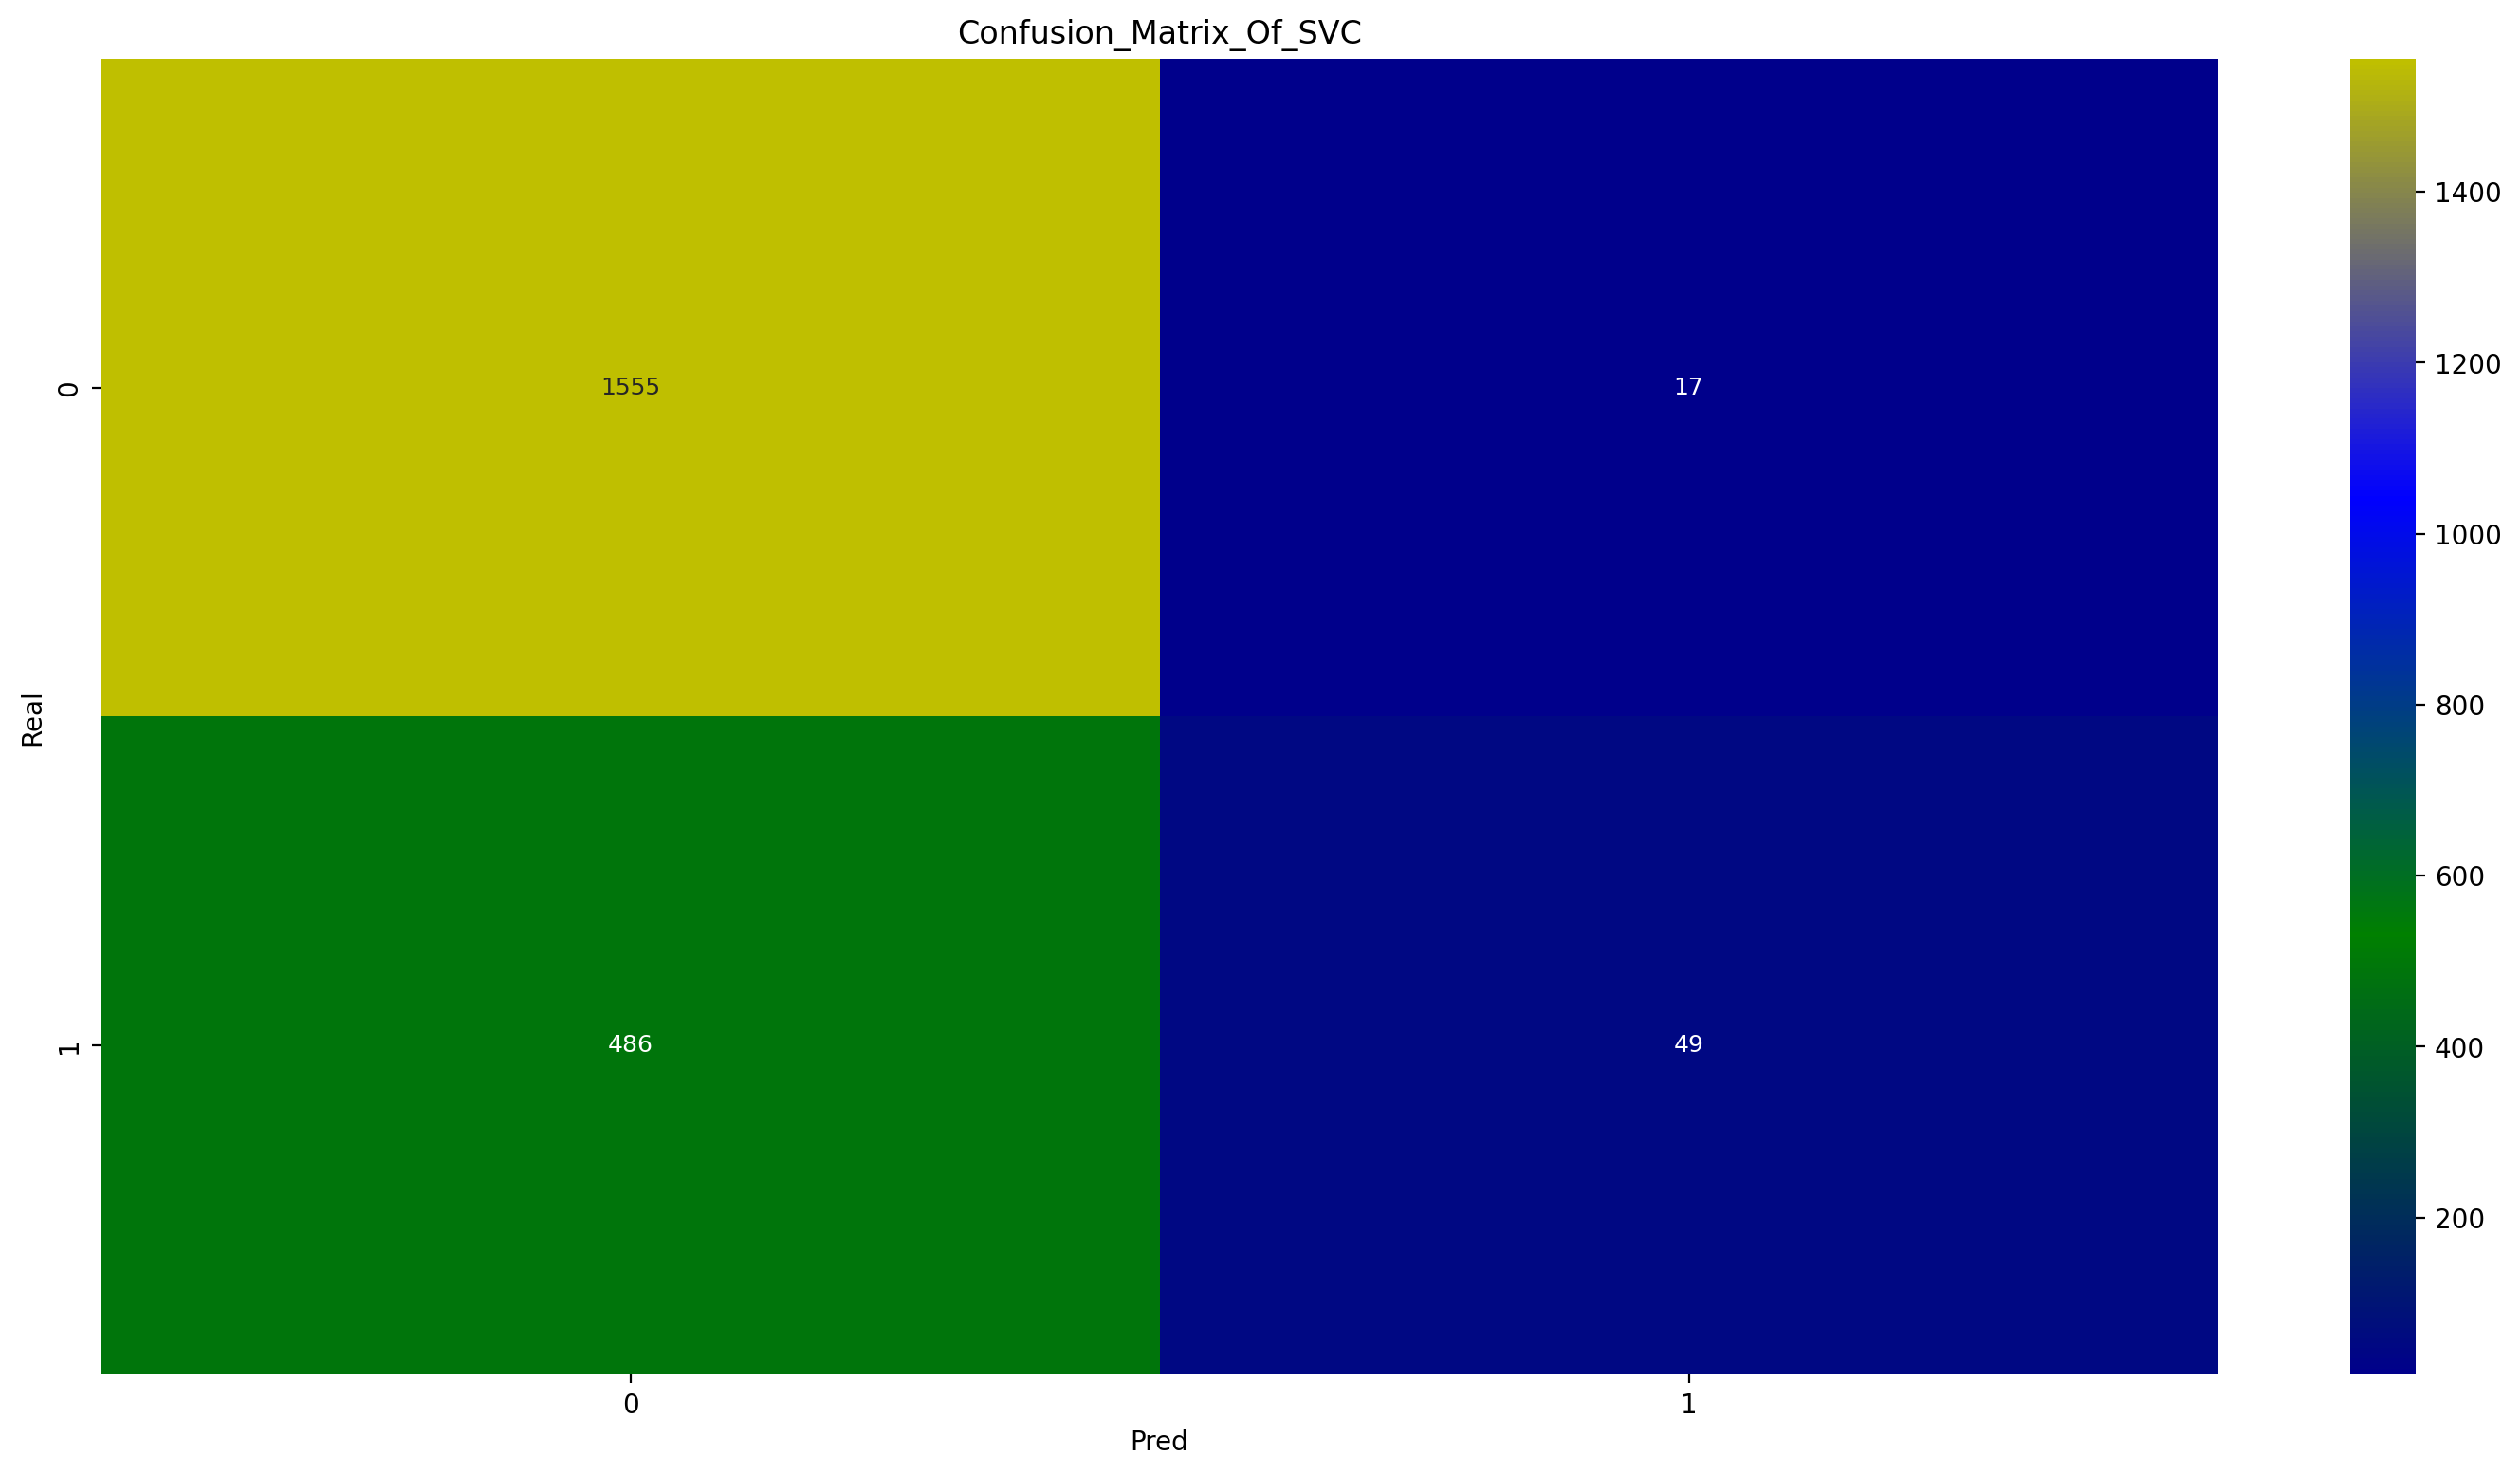

In [ ]:
import matplotlib.colors
from sklearn.metrics import confusion_matrix

conf_matrix_1 = confusion_matrix(y_test,yp)

colors = ["darkblue", "g", "blue", "y"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(18, 9), dpi=200)
ax = plt.subplot()
plt.title("Confusion_Matrix_Of_SVC")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 9},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

**#Decision_Tree_Classification**

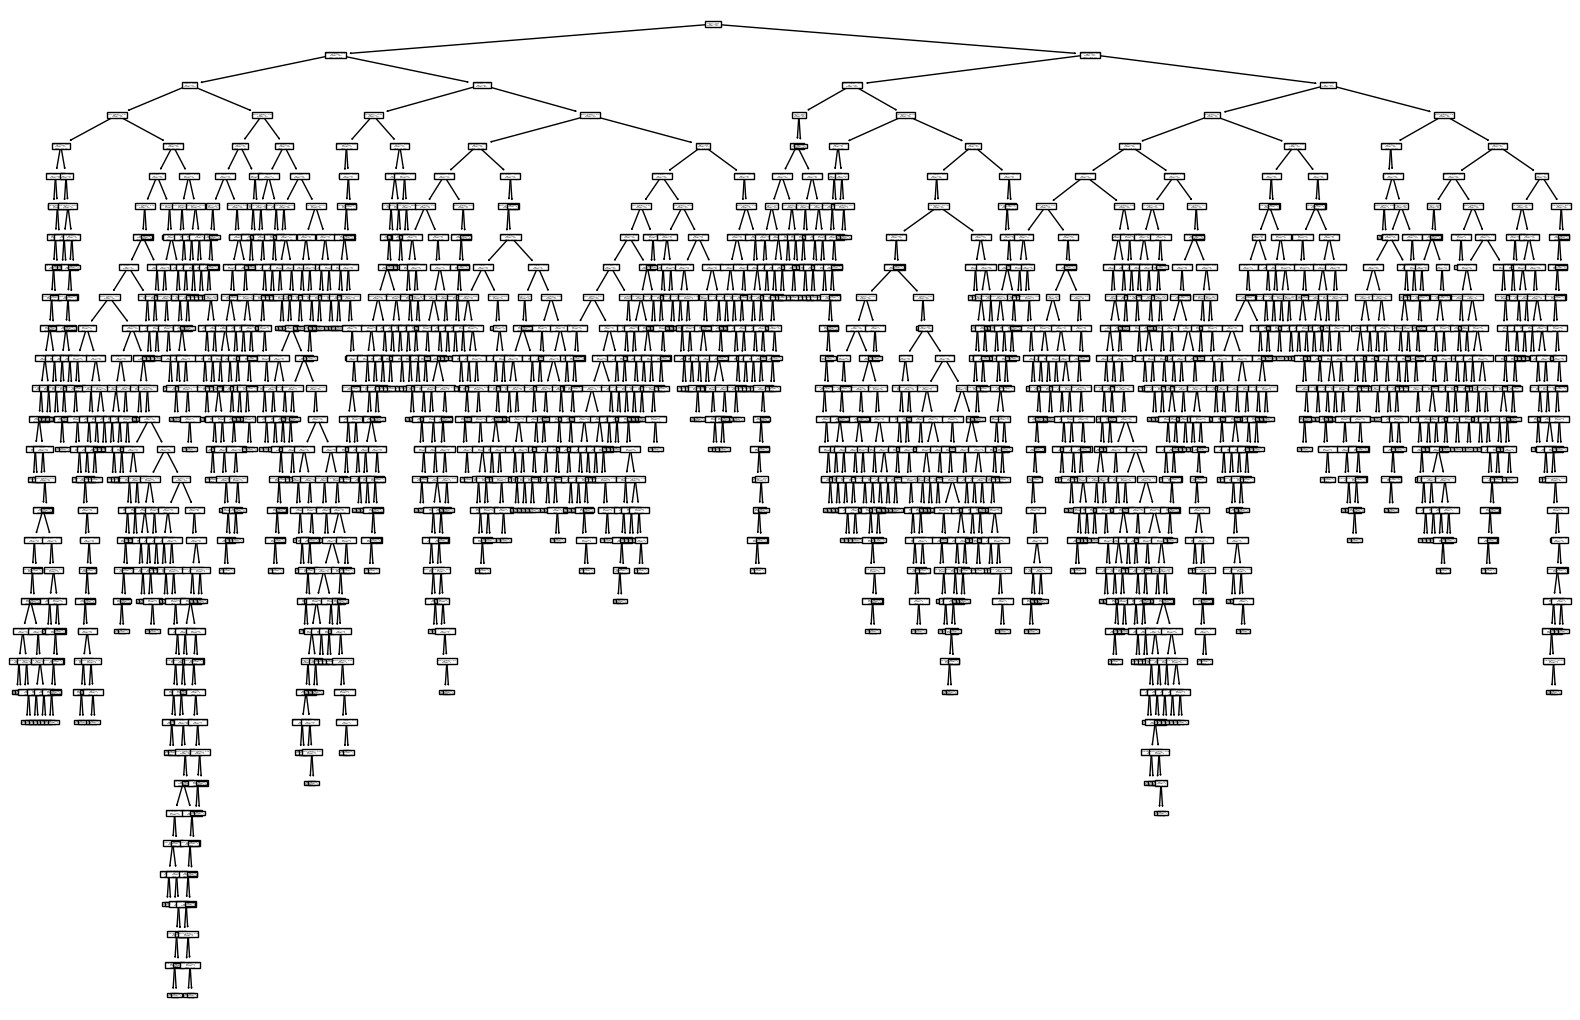

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

plt.figure(figsize=(20,13))
tree.plot_tree(dtree, feature_names=x.columns)
plt.show()

In [ ]:
ypp = dtree.predict(x_test)
from sklearn.metrics import accuracy_score
ac4 = accuracy_score(ypp, y_test)
print(ac4)

0.7005220692928334


**#Confusion_Matrix_Of_Decision_Tree**

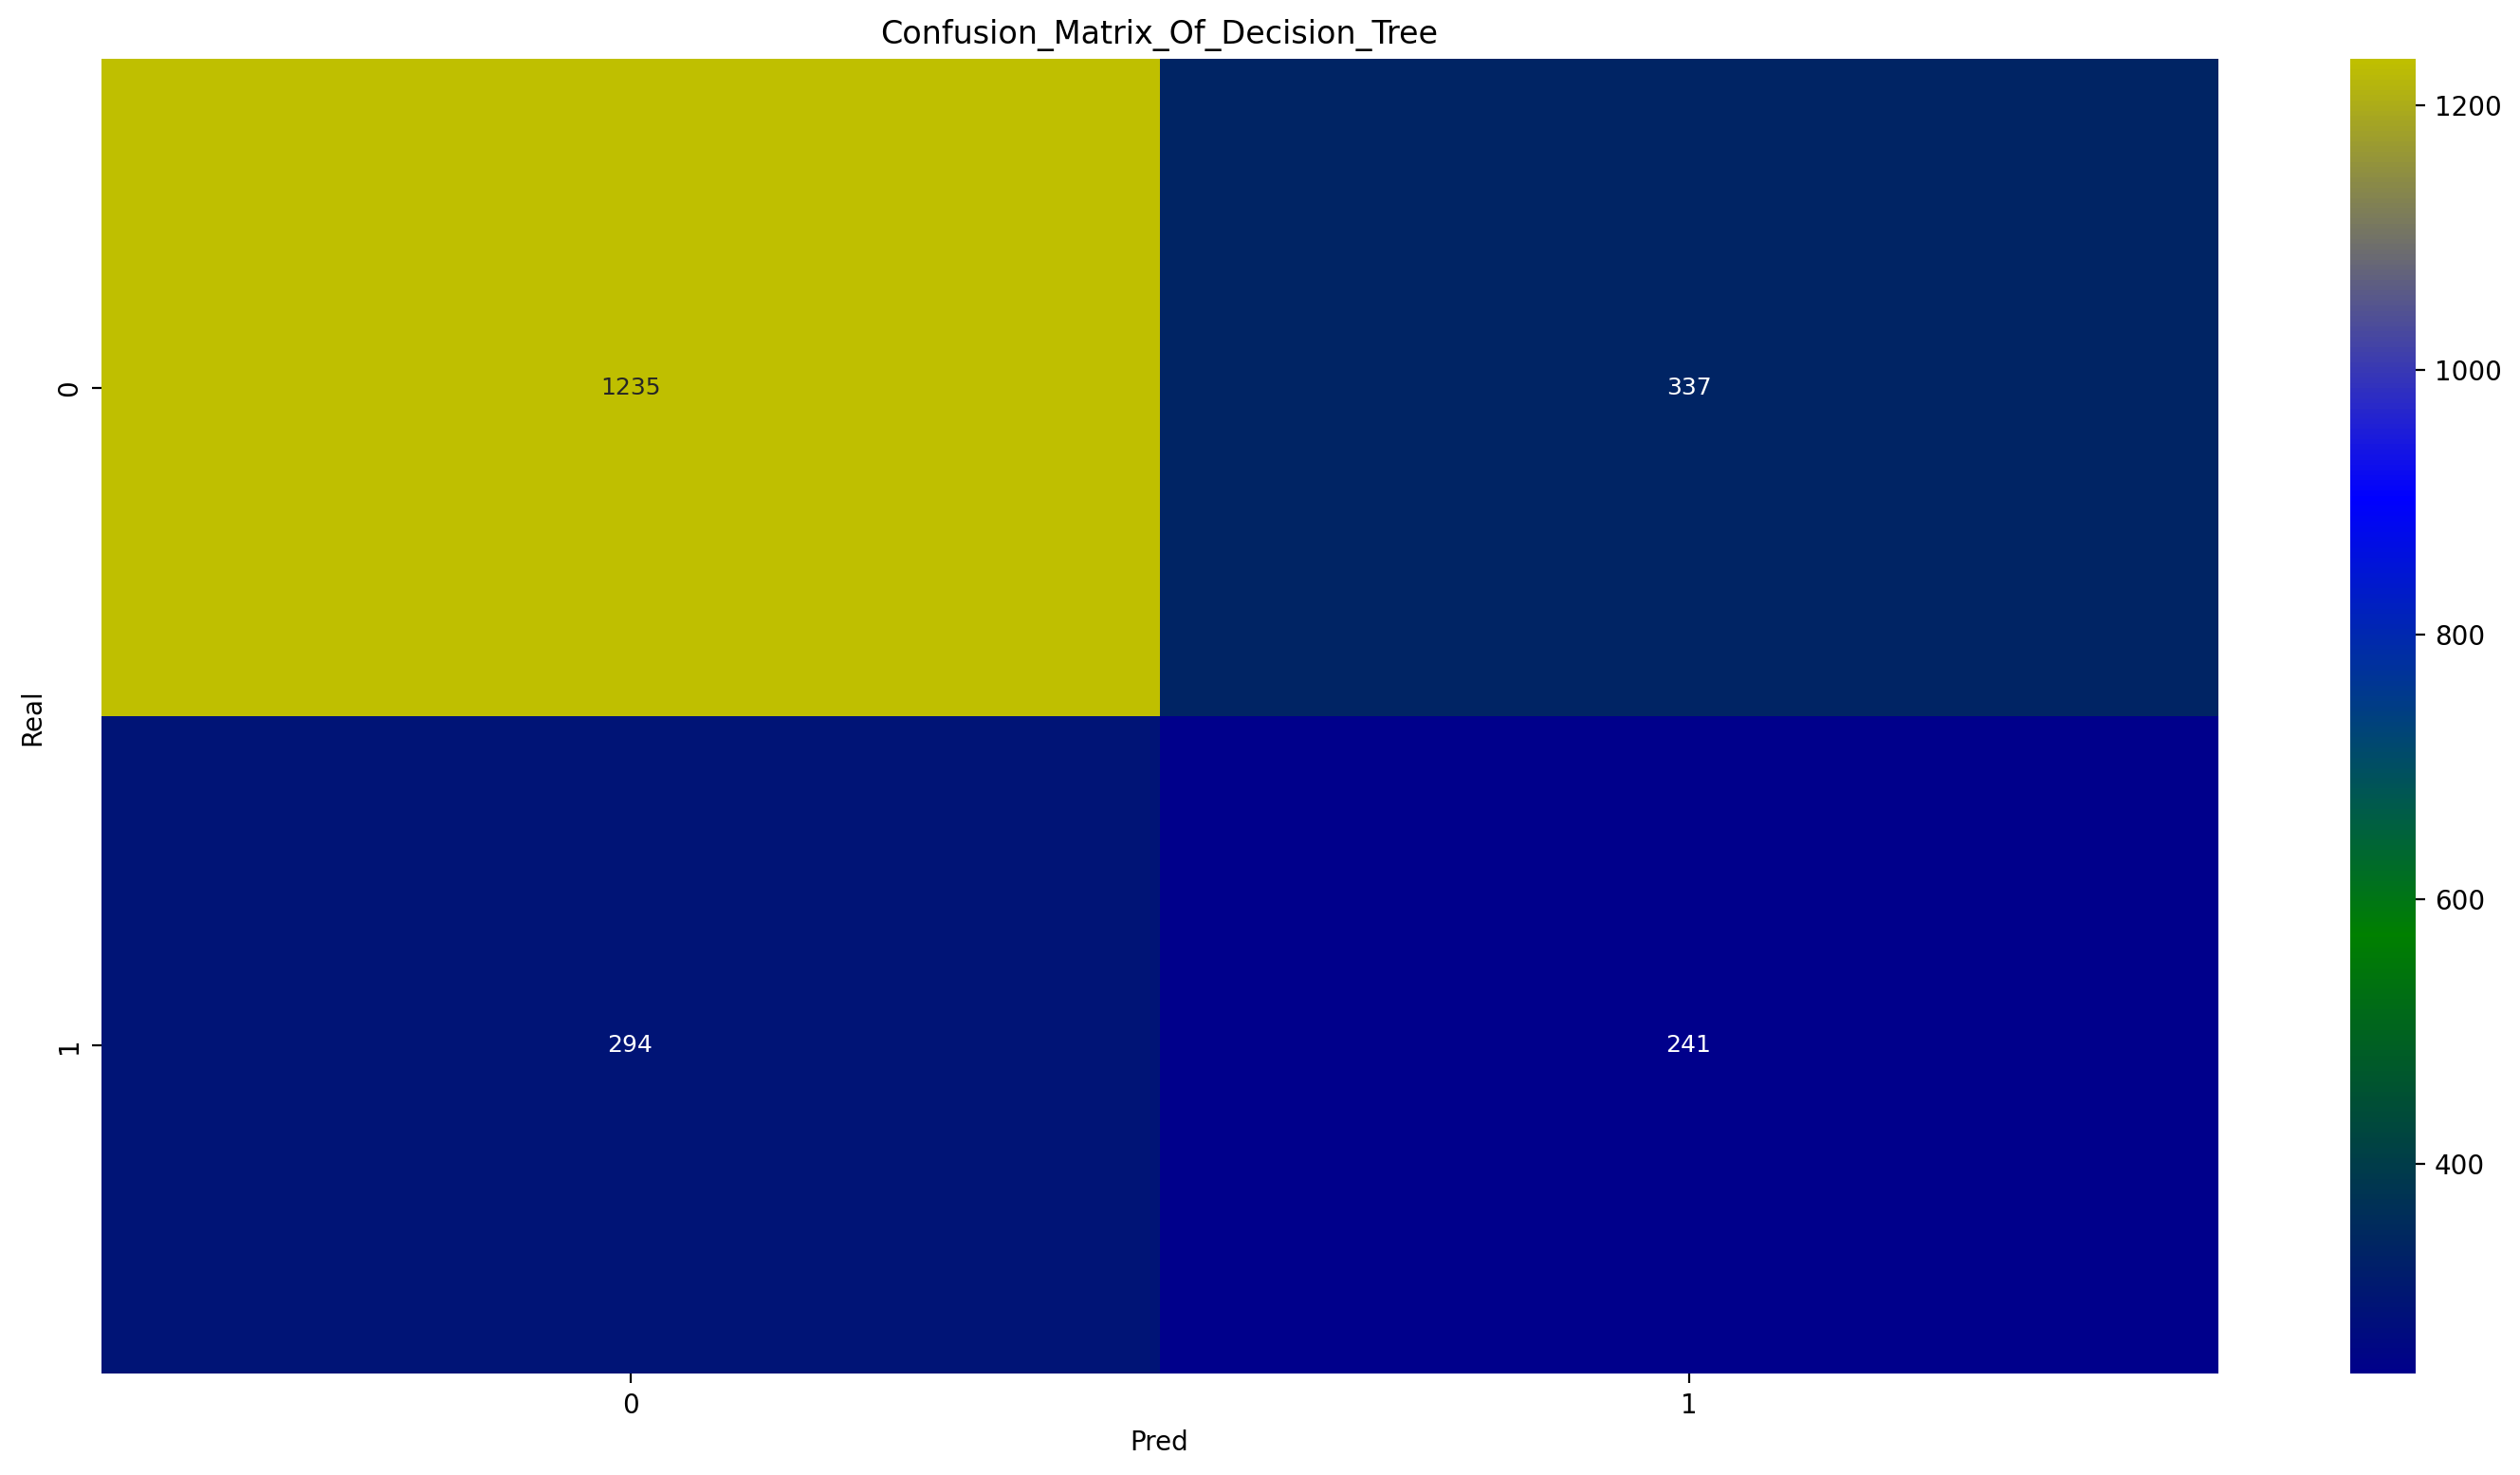

In [ ]:
import matplotlib.colors
from sklearn.metrics import confusion_matrix

conf_matrix_1 = confusion_matrix(y_test,ypp)

colors = ["darkblue", "g", "blue", "y"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(18, 9), dpi=200)
ax = plt.subplot()
plt.title("Confusion_Matrix_Of_Decision_Tree")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 9},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
!pip install colorama
from sklearn.metrics import classification_report
from colorama import Fore, Back, Style

print(Fore.BLUE + Style.BRIGHT + "Classification report for Logistic Regression clf :"+ Style.RESET_ALL)
print(classification_report(y_test, m1.predict(x_test)))
print(Fore.BLUE + Style.BRIGHT + "Classification report for SVM clf :"+ Style.RESET_ALL)
print(classification_report(y_train, clf.predict(x_train)))
print(Fore.BLUE + Style.BRIGHT + "Classification report for Random Forest clf :"+ Style.RESET_ALL)
print(classification_report(y_test, classifier.predict(x_test)))
print(Fore.BLUE + Style.BRIGHT + "Classification report for Decision Tree clf :"+ Style.RESET_ALL)
print(classification_report(y_test, dtree.predict(x_test)))

Classification report for Logistic Regression clf :
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1572
           1       0.61      0.44      0.51       535

    accuracy                           0.79      2107
   macro avg       0.72      0.67      0.69      2107
weighted avg       0.77      0.79      0.77      2107

Classification report for SVM clf :
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      3592
           1       0.77      0.09      0.15      1322

    accuracy                           0.75      4914
   macro avg       0.76      0.54      0.50      4914
weighted avg       0.75      0.75      0.66      4914

Classification report for Random Forest clf :
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1572
           1       0.53      0.33      0.40       535

    accuracy                           0.75     

In [ ]:
Best_models = pd.DataFrame({'Best_models_acc': [ac1, ac2, ac3, ac4],
               'Best_models_name': ('Logistic Regression', 'SVC', 'Random Forest','Decision Tree')})
Best_models.sort_values(by='Best_models_acc',ascending=False ,inplace = True)
Best_models

,Best_models_acc,Best_models_name
0,0.785952,Logistic Regression
2,0.761272,Random Forest
1,0.754627,SVC
3,0.700522,Decision Tree


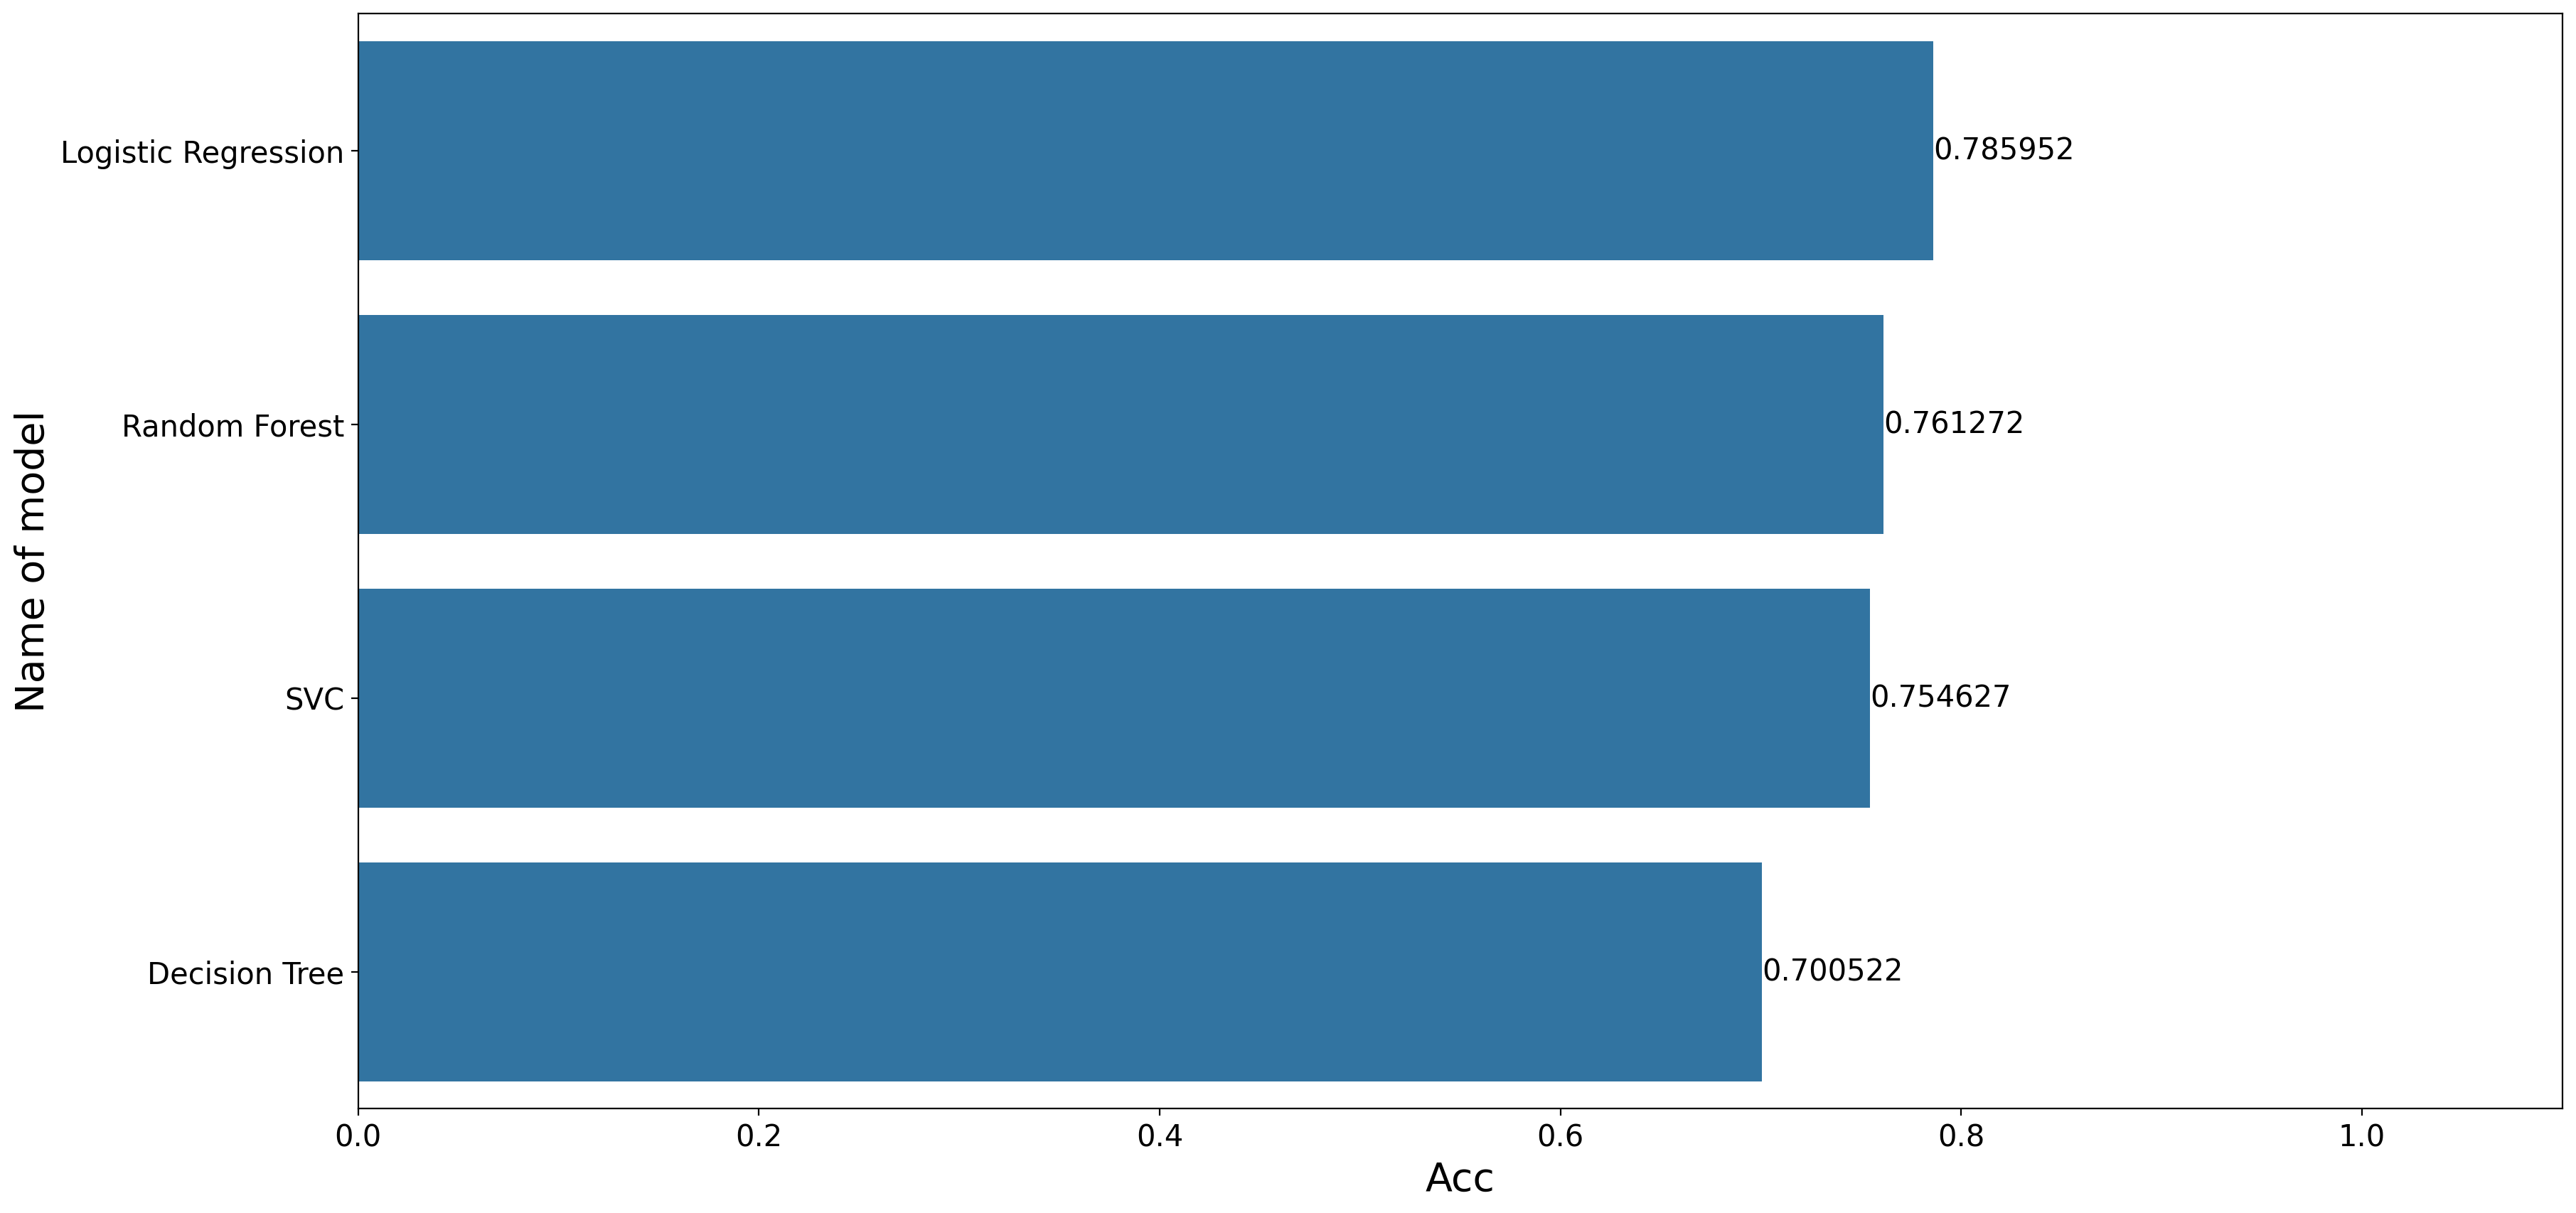

In [ ]:
plt.figure(figsize=(20, 10), dpi=200)
ax = sns.barplot(x="Best_models_acc", y="Best_models_name", data=Best_models, legend=False)
ax.bar_label(ax.containers[0], fontsize=15)
plt.xlabel("Acc", fontsize=20)
plt.ylabel("Name of model", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlim([0, 1.1])
plt.show()

**#Overfitting or underfitting ?**

Based on the provided accuracy scores alone, it's not possible to determine with certainty whether there is overfitting or underfitting in any of the models, including Logistic Regression. Overfitting and underfitting assessments typically require comparing performance on training versus validation/test datasets, and examining how the model performs relative to its complexity and the amount of available data. Without such comparisons, the accuracy scores alone indicate that Logistic Regression is the best-performing model among those listed.

**#Best performing mode & how we can Improve model:**


Based on the provided accuracy scores, the best performing model is **Logistic Regression** with an accuracy of 0.785952. Here's an analysis and reasoning for choosing this model:


***Reasons for Choosing Logistic Regression:***
1. **High Accuracy**: Logistic Regression achieved the highest accuracy among the models listed, indicating it performs better in terms of predicting the correct outcomes compared to the other models evaluated.
   
2. **Interpretability**: Logistic Regression models are relatively easy to interpret compared to more complex models like Random Forest or Support Vector Machines. The coefficients in a logistic regression model can provide insights into the importance of different features in making predictions.

3. **Less Prone to Overfitting**: Logistic Regression tends to generalize well to new data if the model complexity (number of features, regularization) is appropriately managed. This makes it a robust choice especially when the dataset size is not very large.

4. **Efficiency**: Logistic Regression is computationally efficient and can train relatively quickly compared to some other algorithms like SVMs, especially when dealing with large datasets.


*#Analysis of Results and Potential Improvements:*
While Logistic Regression is performing well based on the provided accuracy score, there are always opportunities to improve the model:

1. **Feature Engineering**: Enhancing the feature set by including more relevant features or transforming existing features (e.g., through scaling, binning, or creating interaction terms) can potentially improve model performance.

2. **Regularization**: Fine-tuning the regularization parameter (such as L1 or L2 regularization) can help prevent overfitting and improve the model's ability to generalize to unseen data.

3. **Ensemble Methods**: Although not as interpretable, ensemble methods like Random Forest or Gradient Boosting could potentially yield higher accuracies by combining predictions from multiple models. This approach can sometimes capture complex relationships in the data better than a single logistic regression model.

4. **Hyperparameter Tuning**: Optimize hyperparameters such as learning rate (if using gradient descent), regularization strength, and number of iterations to find the best combination that maximizes performance.

5. **Cross-validation**: Implementing cross-validation techniques can provide a better estimate of model performance and help in selecting the best model configuration.

6. **Handling Imbalanced Data**: If the dataset is imbalanced (i.e., some classes are underrepresented), techniques like oversampling, undersampling, or using class weights can improve the model's ability to predict minority classes.


***#Conclusion:***

Choosing Logistic Regression as the best performing model is justified by its high accuracy and interpretability. However, continuously refining the model through feature engineering, regularization, and possibly exploring ensemble methods can further enhance its performance and robustness across different datasets and scenarios.